In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_v9rqX0R.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [6]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [7]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [8]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [9]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [10]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [11]:
train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [12]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
# to fill missing values in Outlet_Size
Outlet_Size_Type = pd.crosstab(train['Outlet_Size'],train['Outlet_Type']) 
Outlet_Size_Type

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [15]:
# to fill missing values in Outlet_Size
dic = {'Grocery Store':'Small'}
s= train.Outlet_Type.map(dic)
train.Outlet_Size= train.Outlet_Size.combine_first(s)
train.Outlet_Size.value_counts()

Small     2943
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [16]:
Outlet_Location_Type_Size = pd.crosstab(train['Outlet_Size'],train['Outlet_Location_Type']) 
Outlet_Location_Type_Size

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,555


In [17]:
# to fill missing values in Outlet_Size
dic = {'Tier 2':'Small'}
s= train.Outlet_Location_Type.map(dic)
train.Outlet_Size= train.Outlet_Size.combine_first(s)
train.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [18]:
# renaming Item_Fat_Content levels
train.Item_Fat_Content.replace(to_replace=['LF', 'low fat'], value= 'Low Fat', inplace=True)
train.Item_Fat_Content.replace(to_replace=['reg'], value= 'Regular', inplace=True)
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
# to fill missing values in Item_Weight
train['Item_Weight'] = train['Item_Weight'].fillna(train.groupby('Item_Identifier') ['Item_Weight'].transform('mean'))

In [20]:
# to categorize Item Type
train['Item_Type_Category'] = train['Item_Identifier'].apply(lambda x: x[0:2])
train['Item_Type_Category'] = train['Item_Type_Category'].map({'FD' : 'Food', 'NC' : 'Non_Consumables', 'DR' : 'Drinks'})
train['Item_Type_Category'].value_counts()

Food               6125
Non_Consumables    1599
Drinks              799
Name: Item_Type_Category, dtype: int64

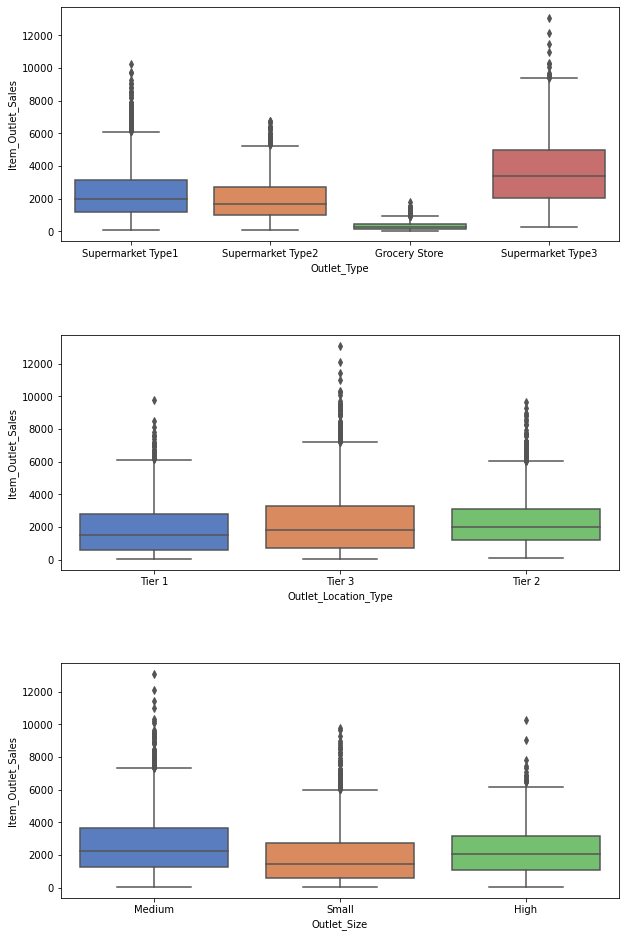

In [22]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data= train, palette = 'muted')

plt.subplot(312)
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data= train, palette = 'muted')

plt.subplot(313)
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data= train, palette = 'muted')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 1.5)

plt.show()

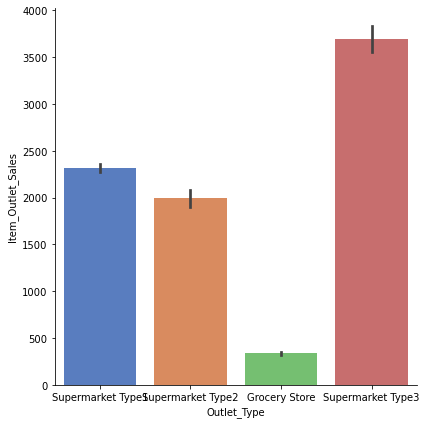

In [24]:
sns.catplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data= train, kind= 'bar', height= 6, palette = 'muted')

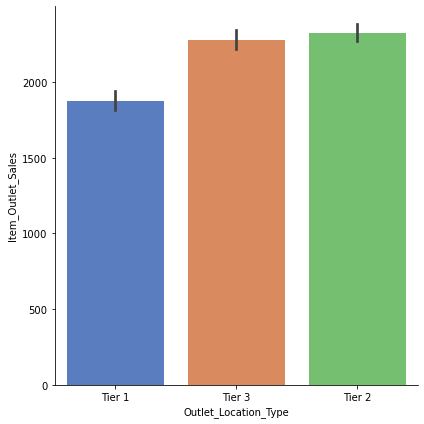

In [25]:
sns.catplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data= train, kind= 'bar', height= 6, palette = 'muted')

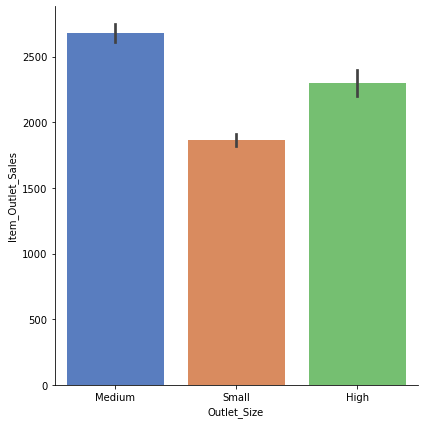

In [26]:
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data= train, kind= 'bar', height= 6, palette = 'muted')

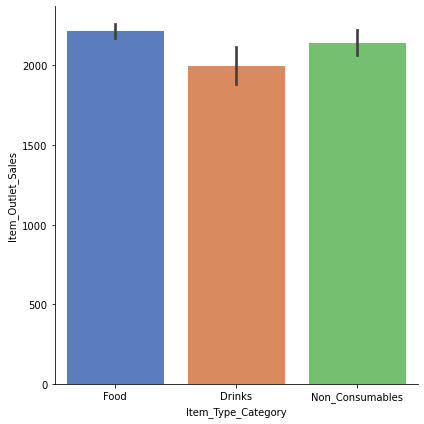

In [27]:
sns.catplot(x = 'Item_Type_Category', y = 'Item_Outlet_Sales', data= train, kind= 'bar', height= 6, palette = 'muted')

In [28]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

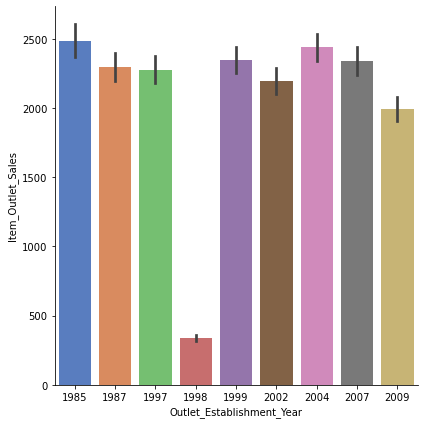

In [29]:
sns.catplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data= train, kind= 'bar', height= 6, palette = 'muted')

In [49]:
# to determine the year of the outlet as at 2009
train['Outlet_Year'] = 2009 - train['Outlet_Establishment_Year']
train['Outlet_Year'].describe()

count    8523.000000
mean       11.168133
std         8.371760
min         0.000000
25%         5.000000
50%        10.000000
75%        22.000000
max        24.000000
Name: Outlet_Year, dtype: float64

<AxesSubplot:xlabel='Outlet_Year', ylabel='Item_Outlet_Sales'>

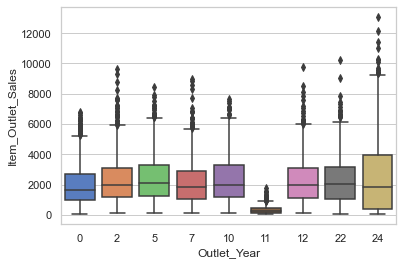

In [51]:
sns.boxplot(x = 'Outlet_Year', y = 'Item_Outlet_Sales', data= train, palette = 'muted')

In [65]:
df = train.loc[train['Outlet_Establishment_Year'] == 1998]
df['Outlet_Type'].value_counts()

Grocery Store    555
Name: Outlet_Type, dtype: int64

In [66]:
df['Outlet_Size'].value_counts()

Small    555
Name: Outlet_Size, dtype: int64

In [67]:
df['Outlet_Location_Type'].value_counts()

Tier 3    555
Name: Outlet_Location_Type, dtype: int64

In [68]:
# Year 1998 had low sales because it had only Tier 3, small sized grocery stores

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

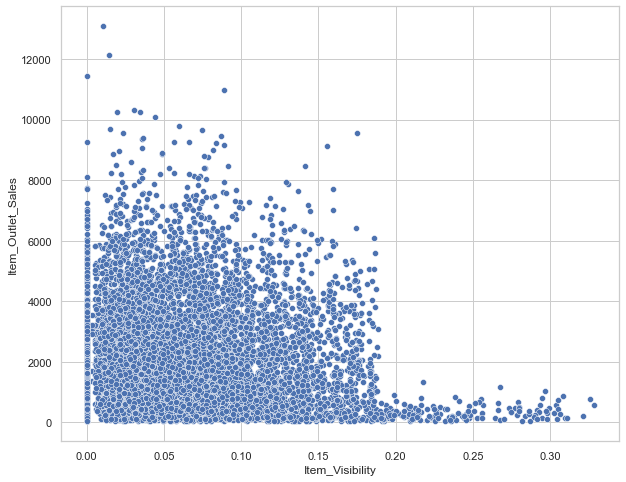

In [63]:
plt.figure(figsize=(10, 8))
sns.set(style= 'whitegrid')
sns.scatterplot(x = 'Item_Visibility', y= 'Item_Outlet_Sales', data=train )
# items with visibility less than 0.20 sold the most 

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

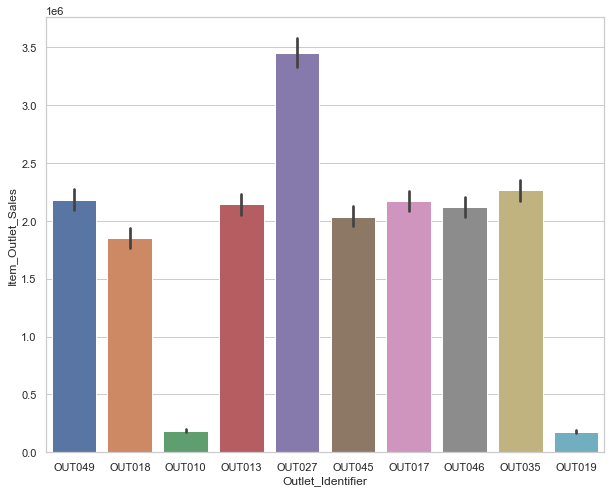

In [22]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train, estimator=sum)

In [23]:
# Top 3 stores: OUT027, OUT035, OUT049
# Bottom 2 stores: OUT010, OUT019

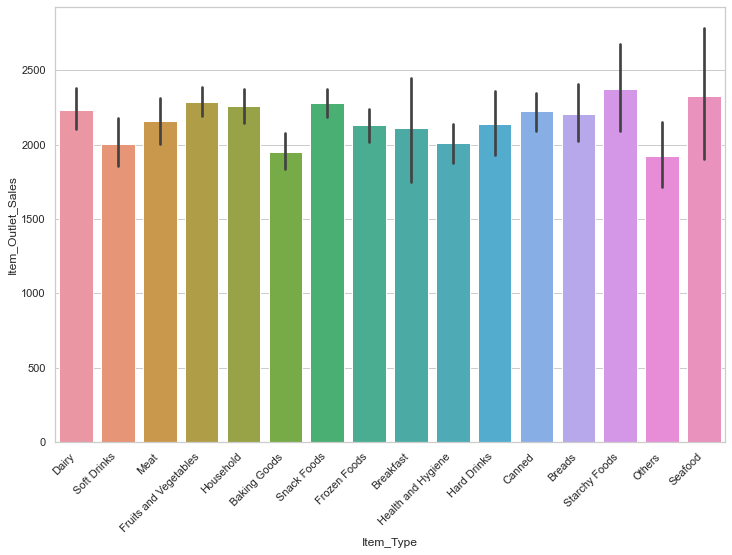

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [25]:
# Starchy foods, Seafood and Dairy sold the most

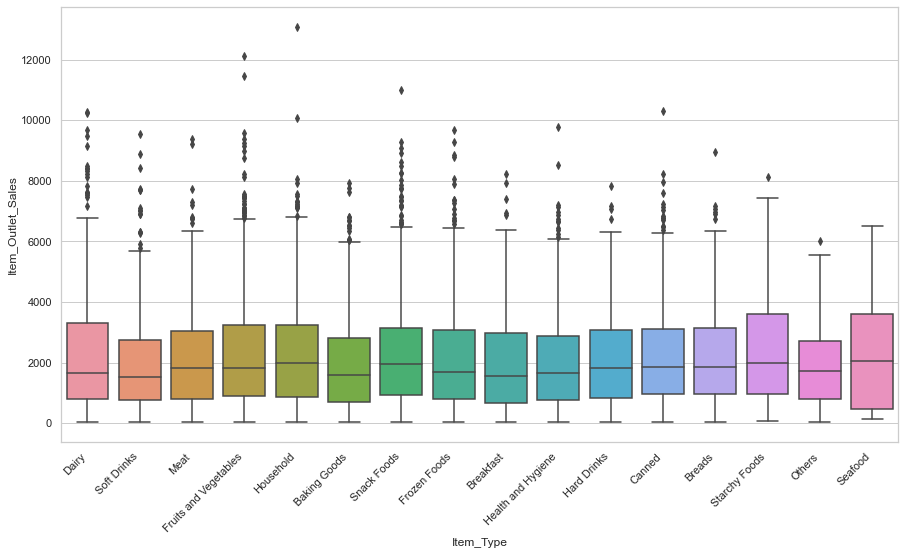

In [26]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [27]:
# Health and hygiene has an outlier

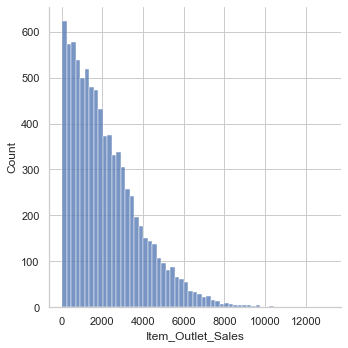

In [76]:
sns.displot(train['Item_Outlet_Sales'])

In [31]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009173,0.025975,-0.013426,0.013168
Item_Visibility,-0.009173,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025975,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.013426,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013168,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

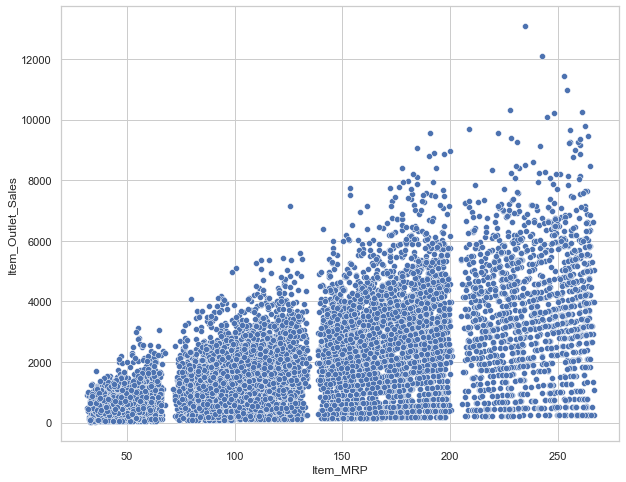

In [32]:
plt.figure(figsize=(10, 8))
sns.set(style= 'whitegrid')
sns.scatterplot(x = 'Item_MRP', y= 'Item_Outlet_Sales', data=train )

In [10]:
# items with high MRP had high sales 